In [1]:
pip install --upgrade matplotlib numpy

  Using cached matplotlib-3.7.2-cp39-cp39-win_amd64.whl (7.5 MB)
     ---------------------------------------- 15.6/15.6 MB 4.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.2
    Uninstalling numpy-1.24.2:
      Successfully uninstalled numpy-1.24.2
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'D:\\myconda\\envs\\py39\\Lib\\site-packages\\numpy\\~ore\\_multiarray_tests.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [3]:
pip list

Package                 Version
----------------------- -----------
absl-py                 1.3.0
aiohttp                 3.8.3
aiosignal               1.2.0
anyio                   3.5.0
appdirs                 1.4.4
argon2-cffi             21.3.0
argon2-cffi-bindings    21.2.0
asttokens               2.0.5
astunparse              1.6.3
async-timeout           4.0.2
attrs                   22.1.0
backcall                0.2.0
beautifulsoup4          4.11.1
bleach                  4.1.0
blinker                 1.6.2
Bottleneck              1.3.5
brotlipy                0.7.0
cachetools              4.2.2
certifi                 2022.12.7
cffi                    1.15.1
charset-normalizer      2.0.4
click                   8.1.6
cloudpickle             2.0.0
colorama                0.4.6
comm                    0.1.2
contourpy               1.0.5
cryptography            39.0.1
cycler                  0.11.0
cytoolz                 0.12.0
dask                    2022.7.0
debugpy          

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf


In [2]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [3]:
#load model

model = tf.keras.models.load_model('./models/plate_detection.h5')
print('model loaded successfully')

model loaded successfully


In [4]:
path = './test/test_1.jpg'
image = load_img(path) #PIL object
image = np.array(image, dtype=np.uint8) #8 bit array (0, 255) range of values
image1 = load_img(path, target_size = (224,224))
image_arr_224 = img_to_array(image1)/255.0 #convert into array and get normalized output

In [5]:
#print size of original image
h,w,d = image.shape
print('Height of image = ', h)
print('Width of image = ', w)

Height of image =  303
Width of image =  472


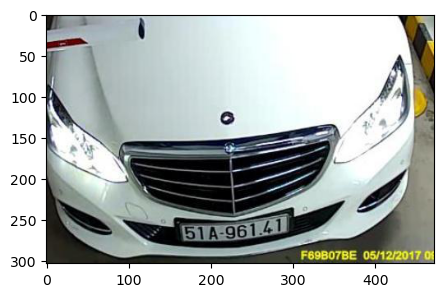

In [6]:
plt.figure(figsize=(5,4))
plt.imshow(image)
plt.show()

In [7]:
image_arr_224.shape

(224, 224, 3)

In [8]:
test_arr = image_arr_224.reshape(1,224,224,3)
test_arr.shape

(1, 224, 224, 3)

In [9]:
# make predictions

coords = model.predict(test_arr)
coords

1/1 [==============================] - 9s 9s/step


array([[0.21731214, 0.55997515, 0.7703933 , 0.89869875]], dtype=float32)

In [10]:
#denormalize the values
denorm = np.array([w,w, h,h])
coords = coords * denorm
coords

array([[102.57133114, 264.3082695 , 233.42917353, 272.30572039]])

In [11]:
coords = coords.astype(np.int32)
coords

array([[102, 264, 233, 272]])

(102, 233) (264, 272)


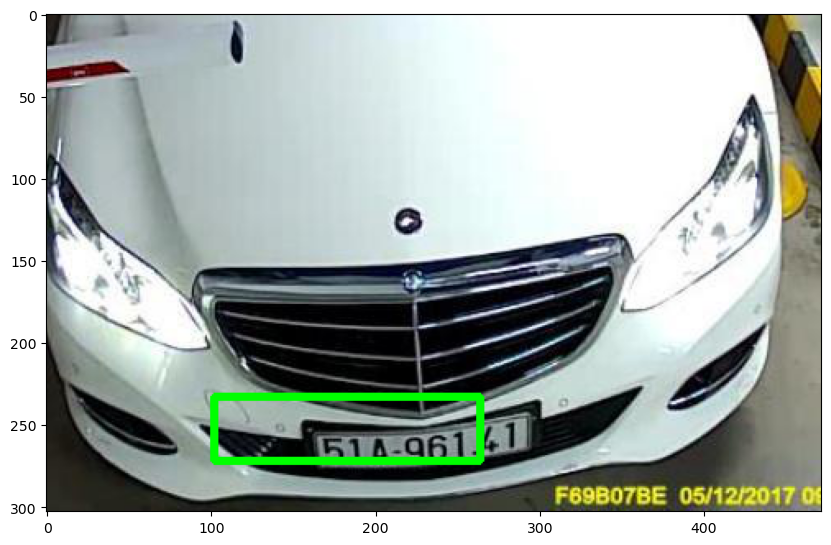

In [12]:
#drawing bounding box on top of image
xmin, xmax, ymin, ymax = coords[0]
pt1 = (xmin, ymin)
pt2 = (xmax, ymax)
print(pt1, pt2)
cv2.rectangle(image,pt1,pt2,(0,255,0),3)


plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [ ]:
# Create pipeline
path = './test images/b74a8551-676c-4b7c-bada-f20f923228c8.jpg'


'''
long version
def object_detection(path):
    image = load_img(path) #PIL object
    image = np.array(image, dtype=np.uint8) #8 bit array (0, 255) range of values
    image1 = load_img(path, target_size = (224,224))
    image_arr_224 = img_to_array(image1)/255.0 #convert into array and get normalized output
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)
    test_arr.shape
    # make predictions
    coords = model.predict(test_arr)
    coords
    #denormalize the values
    denorm = np.array([w,w, h,h])
    coords = coords * denorm
    coords
    coords = coords.astype(np.int32)
    coords
    #drawing bounding box on top of image
    xmin, xmax, ymin, ymax = coords[0]
    pt1 = (xmin, ymin)
    pt2 = (xmax, ymax)
    print(pt1, pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)

    plt.figure(figsize=(10,8))
    plt.imshow(image)
    plt.show()
'''
def object_detection(path):
    #read image
    image = load_img(path) #PIL object
    image = np.array(image, dtype=np.uint8) #8 bit array (0, 255) range of values
    image1 = load_img(path, target_size = (224,224))
    #data preprocessing
    image_arr_224 = img_to_array(image1)/255.0 #convert into array and get normalized output
    h,w,d = image.shape
    test_arr = image_arr_224.reshape(1,224,224,3)
    # make predictions
    coords = model.predict(test_arr)
    #denormalize the values
    denorm = np.array([w,w, h,h])
    coords = coords * denorm
    coords = coords.astype(np.int32)
    #drawing bounding box on top of image
    xmin, xmax, ymin, ymax = coords[0]
    pt1 = (xmin, ymin)
    pt2 = (xmax, ymax)
    print(pt1, pt2)
    cv2.rectangle(image,pt1,pt2,(0,255,0),3)
    return image, coords 

In [ ]:
import pytesseract as pt


In [ ]:
path = './test images/cd93cce3-8079-4c96-a9a6-67335e4f891f.jpg'
image, coords = object_detection(path)

plt.figure(figsize=(10,8))
plt.imshow(image)
plt.show()

In [ ]:
img = np.array(load_img(path))
img

In [ ]:
# crop image

roi = img[ymin:ymax, xmin:xmax]

In [ ]:
plt.imshow(roi)
plt.show()

In [ ]:
#extract text from image
 
plt.image_to_string(roi)